# Depth findings in Books

## Retrieve places and dates to put books in historical contexts

### Importing Data

Importing relevant packages:

In [1]:
import re
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_books_reviews = pd.read_csv('../Data/processed/books/sentiment_patterns_books_reviews.csv', index_col=False)

In [3]:
df_books_reviews.rename(columns = {'Unnamed: 0': 'counter'}, inplace=True)

In [4]:
df_books_reviews.head(3)

,counter,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id,title,description,text_normalized,polarity_textBlob,subjectivity_textBlob,sentiment_scores,sentiment_category
0,0,16981,False,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, 'Recommended by Don Katz.'], [0, 'Avail f...",2017-03-22,8842281e1d1347389f2ab93d60773d4d,Invisible Man,First published in 1952 and immediately hailed...,recommended by don katz avail for free in dece...,0.4000,0.8000,3.0,positive
1,1,16981,False,4,706a8032efbde550167bf0d96c2ab501,"[[0, 'This book was actually good, so long tho...",2015-02-25,2159f55d397e8fbe68d5e03668e7d9d2,Invisible Man,First published in 1952 and immediately hailed...,this book wa actually good so long though haha...,0.4125,0.5125,9.0,positive
2,2,16981,False,3,f72cb35f64a70beeda185dd744782b53,"[[0, 'Immensely complicated look at the many f...",2014-03-09,22b29f4e3b4b679ac9abb2c09f9a940e,Invisible Man,First published in 1952 and immediately hailed...,immensely complicated look at the many facet o...,-0.2500,0.5250,-5.0,negative


In [5]:
df_books = pd.read_csv('../Data/processed/books/books_noDict_year.csv', index_col=False)

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581450 entries, 0 to 581449
Data columns (total 32 columns):
Unnamed: 0              581450 non-null int64
asin                    41515 non-null object
authors                 581450 non-null object
average_rating          581450 non-null float64
book_id                 581450 non-null int64
country_code            581450 non-null object
description             581450 non-null object
edition_information     68270 non-null object
format                  559346 non-null object
image_url               581450 non-null object
is_ebook                581450 non-null bool
isbn                    413393 non-null object
isbn13                  475271 non-null object
kindle_asin             242123 non-null object
language_code           355032 non-null object
link                    581450 non-null object
num_pages               581450 non-null float64
popular_shelves         581450 non-null object
publication_day         452057 non-null float64

In [7]:
df_books_col = df_books.loc[:, ['book_id', 'title', 'language_code', 
                  'description', 'similar_books', 'average_rating', 'ratings_count',
                  'num_pages', 'text_reviews_count']]

In [8]:
df_books_col.head()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",eng,Omnibus book club edition containing the Ladie...,"['19997', '828466', '1569323', '425389', '1176...",4.03,140.0,600.0,7.0
1,287141,The Aeneid for Boys and Girls,NaN,"Relates in vigorous prose the tale of Aeneas, ...",[],4.13,46.0,162.0,7.0
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,NaN,"To Kara's astonishment, she discovers that a p...","['948696', '439885', '274955', '12978730', '37...",4.22,98.0,216.0,6.0
3,287149,The Devil's Notebook,NaN,"Wisdom, humor, and dark observations by the fo...","['287151', '1104760', '1172822', '440292', '28...",3.81,986.0,147.0,39.0
4,6066814,"Crowner Royal (Crowner John Mystery, #13)",NaN,"London, 1196. At the command of Richard the Li...","['439108', '522621', '116770', '1275927', '620...",3.93,186.0,400.0,15.0


In [9]:
english_list = ['eng', 'en-US', 'en-GB', 'en-CA', 'en', 'en-IN']

In [10]:
df_books_col_eng = df_books_col[df_books_col.language_code.isin(english_list)]

In [11]:
try:
    assert len(df_books_col.books_id) == len(df_books_col.books_id.unique())
except:
    df_books_col.drop_duplicates('book_id', keep='first', inplace=True)

Selecting index to analyse tags:

In [12]:
ind = [19, 57, 59, 295,
       465, 2598, 2671, 
       2673, 2717, 2786,
       2930, 2961, 2968]

In [13]:
df_sample_PoS = df_books_col_eng.loc[ind, :]

In [14]:
df_sample_PoS.head()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
19,13598461,Labor and Desire: Women's Revolutionary Fictio...,eng,"""This critical, historical, and theoretical st...",[],4.00,2.0,236.0,1.0
57,17368265,"White Fire (Pendergast, #13)",eng,Past and present collide as Special Agent Pend...,"['11007668', '16065538', '15841850', '13539179...",4.07,250.0,13.0,46.0
59,27036536,"War Stories, Volume 3",eng,PRODUCT DESCRIPTION: The first new volume of G...,[],4.15,39.0,224.0,9.0
295,54276,The Young Hitler I Knew,en-US,August Kubizek met Adolf Hitler in 1904 and ov...,"['761406', '402169', '761412', '355434', '9121...",4.00,180.0,264.0,20.0
465,18593020,Christmas at High Rising,eng,Originally published in the 1930s and 1940s an...,"['17288609', '1354904', '25369829', '1404710',...",3.45,179.0,146.0,47.0


Importing spacy and the model `en_core_web_sm`

In [15]:
import sys
!{sys.executable} -m spacy download en_core_web_sm
#! python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [16]:
import spacy
from spacy.lang.en import English
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [17]:
for i in df_sample_PoS.index:
    doc = nlp(df_sample_PoS.description[i])
    print(df_sample_PoS.title[i])
    print('Book id: {}'.format(i))
    print([(X.text, X.label_) for X in doc.ents])
    displacy.render(nlp(df_sample_PoS.description[i]), jupyter=True, style='ent')

Labor and Desire: Women's Revolutionary Fiction in Depression America
Book id: 19
[('the 1930s', 'DATE'), ('Paula Rabinowitz', 'PERSON'), ('the decade', 'DATE'), ('Amazon', 'ORG')]


White Fire (Pendergast, #13)
Book id: 57
[('Special Agent Pendergast', 'ORG'), ('19th century', 'DATE'), ('Colorado', 'GPE'), ('Sherlock Holmes', 'PERSON'), ('1876', 'DATE'), ('Roaring Fork', 'ORG'), ('the Colorado Rockies', 'FAC'), ('eleven', 'CARDINAL'), ('Corrie Swanson', 'PERSON'), ('FBI', 'ORG'), ('multimillion-dollar', 'MONEY'), ('Pendergast', 'ORG'), ('Sherlock Holmes', 'PERSON'), ('Corrie', 'PERSON')]


War Stories, Volume 3
Book id: 59
[('first', 'ORDINAL'), ('Garth Ennis', 'FAC'), ('War Stories', 'LOC'), ('three', 'CARDINAL'), ('Ennis', 'ORG'), ('Tomas Aira', 'PERSON'), ('Sky', 'FAC'), ('Germany', 'GPE'), ('Israel', 'GPE'), ('1973', 'DATE'), ('the Golan Heights', 'LOC'), ('Israel', 'GPE'), ('Syrian', 'NORP'), ('February 1945', 'DATE'), ('Soviet', 'NORP'), ('Germany', 'GPE'), ('War Stories', 'LOC')]


The Young Hitler I Knew
Book id: 295
[('August', 'DATE'), ('Adolf Hitler', 'PERSON'), ('1904', 'DATE'), ('the next four years', 'DATE'), ('Vienna', 'GPE'), ('Hitler', 'PERSON'), ('these formative years', 'DATE')]


Christmas at High Rising
Book id: 465
[('1930s', 'DATE'), ('1940s', 'DATE'), ('Angela Thirkell', 'PERSON'), ('Christmas Day', 'DATE'), ('Laura Morland', 'PERSON'), ('Low Rising', 'PERSON'), ('London', 'GPE'), ('any season of the year', 'DATE')]


The Secret Adventures of Charlotte Brontë (The Secret Adventures of Charlotte Brontë #1)
Book id: 2598
[("Laura Joh Rowland's", 'PERSON'), ('San Ichiro', 'GPE'), ('thousands', 'CARDINAL'), ('Victorian England', 'LOC'), ('Bronte', 'PERSON'), ('Laura Joh Rowland', 'PERSON'), ('the legendary 19th century', 'DATE'), ('Victorian England', 'LOC'), ('Rochester', 'PERSON'), ('007', 'CARDINAL'), ('the British Empire', 'GPE'), ('Charlotte Bronte', 'PERSON')]


Crime and Punishment
Book id: 2671
[('Dostoevsky', 'ORG'), ('Raskolnikov', 'PERSON'), ('St Petersburg', 'GPE')]


A Gilded Grave
Book id: 2673
[('First', 'ORDINAL'), ('Celebration Bay', 'LOC'), ('1895', 'DATE'), ('Newport', 'GPE'), ('Rhode Island', 'GPE'), ('first Newport season', 'DATE'), ('Deanna Randolph', 'PERSON'), ('David Manchester', 'PERSON'), ('Barbadian', 'NORP'), ('Madeline', 'PERSON'), ('Manchesters', 'PERSON'), ('Joseph Ballard', 'PERSON'), ('one', 'CARDINAL'), ('Joe', 'PERSON'), ('Deanna', 'PERSON')]


Zombie Killing Stoners, Episode 2: The Coming Storm
Book id: 2717
[('Zompoc', 'GPE'), ('Lower Manhattan', 'LOC'), ('the Brooklyn Bridge', 'FAC'), ('Zombies', 'PERSON')]


1892
Book id: 2786
[('1892', 'DATE'), ('Paul Butler', 'PERSON'), ('19th century', 'DATE'), ("St. John's", 'GPE'), ('Kathleen', 'GPE'), ('Ireland', 'GPE'), ('Glenwood', 'PERSON'), ('first', 'ORDINAL'), ('Tommy Fitzpatrick', 'PERSON'), ('Kathleen', 'GPE'), ('2009', 'DATE')]


Ines Of My Soul
Book id: 2930
[('Ines Suarez', 'PERSON'), ('Chile', 'GPE'), ('1540', 'DATE'), ('Spain', 'GPE'), ('first', 'ORDINAL'), ('Spanish', 'NORP'), ('Santiago', 'GPE'), ('Isabel Allende', 'PERSON'), ('one', 'CARDINAL'), ('Ines', 'GPE'), ('two', 'CARDINAL'), ('Ines of My Soul', 'WORK_OF_ART'), ('Chile', 'GPE'), ('Ines', 'GPE'), ('Allende', 'PERSON'), ('Ines', 'GPE')]


The Reluctant Queen: The Story of Anne of York (Queens of England, #8)
Book id: 2961
[('1470', 'DATE'), ('Lady Anne Neville', 'PERSON'), ('Earl', 'PERSON'), ('Warwick', 'GPE'), ('Edward', 'PERSON'), ('Anne', 'ORG'), ('Richard', 'PERSON'), ('England', 'GPE'), ('Edward', 'PERSON'), ('the Battle of Tewkesbury', 'LAW'), ('Westminster Abbey', 'PERSON'), ('Middleham Castle', 'FAC'), ('Richard', 'PERSON'), ('Richard III', 'PERSON'), ('Anne', 'ORG'), ('two years', 'DATE'), ('two months', 'DATE'), ('two days', 'DATE'), ('Anne', 'PERSON'), ('Richard', 'PERSON'), ('the House of York', 'ORG')]


The File: A Personal History
Book id: 2968
[('Timothy Garton Ash', 'PERSON'), ('Oxford', 'GPE'), ('1978', 'DATE'), ('Berlin', 'GPE'), ('Nazism', 'NORP'), ('East Germany', 'GPE'), ('East German', 'NORP'), ('Stasi', 'ORG'), ('the years', 'DATE'), ('East German', 'NORP'), ('Stasi', 'ORG'), ('Garton Ash', 'PERSON'), ('Darkness', 'LOC'), ('Noon', 'ORG')]


In [18]:
#df_genres_books = pd.read_csv('../Data/processed/books/genres_books.csv')
df_genres_books = pd.read_csv('../Data/processed/books/classification_genres_books.csv')

In [19]:
df_genres_books.head(2)

,Unnamed: 0,id,title,language_code,description,similar_books,ratings_count,num_pages,text_reviews_count,average_rating,...,Drama_b,Family_b,Fantasy_b,History_b,Horror_b,Music_b,Mystery_b,Romance_b,Thriller_b,War_b
0,901,16137127,Certainty and the Search for Absolute Truth,eng,Wait! Before you fly into that building...\nWh...,[],1.0,162.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6925,14740987,A State of Symmetry,eng,"Novel first published in South Africa in 1996,...",[],2.0,380.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [20]:
df = df_genres_books.loc[:, [
               'Action_b', 'Adventure_b', 'Crime_b', 'Documentary_b',
               'Drama_b', 'Family_b', 'Fantasy_b', 'History_b', 'Horror_b',
               'Music_b', 'Mystery_b', 'Thriller_b', 'Romance_b', 'War_b']]

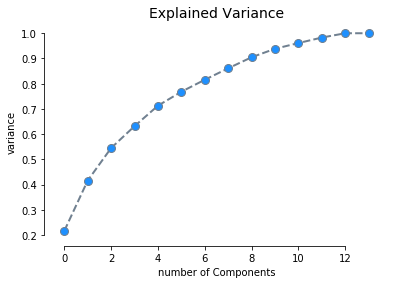

In [21]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA().fit(df)
#Plotting the Cumulative Summation of the Explained Variance
_ = plt.figure()
_ = plt.plot(np.cumsum(pca.explained_variance_ratio_), 
             color='slategrey',
             marker='o', 
             linestyle='dashed',
             linewidth=2,
             markersize=8,
             markerfacecolor='dodgerblue')
_ = plt.xlabel('number of Components', fontsize=10)
_ = plt.ylabel('variance', fontsize=10) #for each component
_ = plt.title('Explained Variance', fontsize=14)
_ = sns.despine(offset=5, trim=True)

In [22]:
print (pca.explained_variance_ratio_.cumsum())

[0.21621565 0.41590383 0.54486634 0.63158063 0.71272612 0.76804013
 0.81555599 0.8609312  0.90481092 0.93842395 0.96106588 0.98290575
 1.         1.        ]


In [23]:
pca = PCA(n_components=12)
pca_result = pca.fit_transform(df)

In [24]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
cluster.fit_predict(pca_result)

array([7, 6, 1, ..., 0, 5, 2])

In [25]:
df['x'] = pca_result[:,0] 
df['y'] = pca_result[:,1]
df['label'] = cluster.labels_

In [26]:
df.groupby('label').sum()

,Action_b,Adventure_b,Crime_b,Documentary_b,Drama_b,Family_b,Fantasy_b,History_b,Horror_b,Music_b,Mystery_b,Thriller_b,Romance_b,War_b,x,y
label,,,,,,,,,,,,,,,,
0,21.0,220.0,0.0,71.0,156.0,265.0,174.0,8.0,52.0,33.0,5.0,7.0,49.0,3.0,56.343396,-186.835292
1,8.0,31.0,3.0,47.0,266.0,108.0,221.0,42.0,11.0,25.0,22.0,12.0,267.0,9.0,-217.165113,-120.192912
2,247.0,166.0,43.0,43.0,109.0,42.0,19.0,11.0,82.0,9.0,4.0,185.0,31.0,9.0,147.494499,145.044610
3,11.0,15.0,17.0,6.0,223.0,47.0,83.0,2.0,44.0,1.0,86.0,231.0,162.0,0.0,-159.877820,137.497059
4,4.0,59.0,1.0,188.0,167.0,55.0,88.0,172.0,13.0,27.0,3.0,7.0,51.0,25.0,-74.805915,-78.843139
5,162.0,162.0,1.0,16.0,0.0,70.0,162.0,10.0,34.0,2.0,1.0,16.0,5.0,7.0,178.156612,-66.075442
6,30.0,3.0,92.0,0.0,14.0,3.0,1.0,2.0,36.0,0.0,92.0,91.0,4.0,0.0,13.880958,128.508160
7,12.0,28.0,0.0,7.0,61.0,56.0,102.0,13.0,128.0,4.0,54.0,85.0,8.0,2.0,19.274850,42.219993
8,48.0,43.0,1.0,27.0,13.0,5.0,0.0,57.0,1.0,3.0,0.0,0.0,0.0,38.0,36.698533,-1.323037


In [49]:
df_genres_books[df.label == 2]

,Unnamed: 0,id,title,language_code,description,similar_books,ratings_count,num_pages,text_reviews_count,average_rating,...,Drama_b,Family_b,Fantasy_b,History_b,Horror_b,Music_b,Mystery_b,Romance_b,Thriller_b,War_b
13,39157,20648401,"Spanish Agent, An Erotic Spy Thriller",eng,Erotic Spy Thriller,[],1.0,300.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
20,50064,13583279,Pirates of Nirado River,eng,The forests of Northwestern Ontario are home t...,[],1.0,78.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,77303,14759866,The Theory of Evolution,eng,Part I\nAs Applied to Man\nPart II\nAs Applied...,[],1.0,374.0,1.0,1.00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34,96640,29418685,Lost Gold,eng,"In ""The Dragon Was a Lady,"" Faith Thorndike in...",[],0.0,288.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41,122302,9889435,Too Fast We Live,eng,"Lust, Violence and Greed in the Deep South. A ...",[],1.0,160.0,1.0,1.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42,122312,36359564,Lost Identity,eng,Everything in the Continental state is perfect...,[],1.0,109.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43,123795,18108537,A Long Way Home,eng,"A single act can change the fate of a man, eve...",[],1.0,224.0,1.0,1.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,215660,36105253,Lady of the Line,eng,"Western set in the fictional Bonanza Wells, wh...",[],1.0,158.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,233826,32471481,Warning Adults Only: The 9 Daily Success Habit...,eng,What women secretly wish YOU knew about dating...,[],1.0,118.0,1.0,1.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
74,250296,2436656,RealU Guide to Road Safety and Car Care,eng,Are you a menace on wheels? Find out how to ha...,[],1.0,64.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
